In [225]:
import pandas as pd

In [226]:
import sys
#reload(sys)
print(sys.getdefaultencoding())
#sys.setdefaultencoding("utf-8")

utf-8


In [227]:
df = pd.read_csv('variables.csv', index_col=0)

In [228]:
len(df)

236

In [229]:
df.Tour1Candidat1.unique()

array(['FILLON FranÃ§ois', 'MACRON Emmanuel', 'MÃ‰LENCHON Jean-Luc',
       'LE PEN Marine'], dtype=object)

In [230]:
df['candidat_last_name'] = df['Tour1Candidat1'].apply(lambda x: x.split(' ')[0])

In [231]:
df.candidat_last_name.unique()

array(['FILLON', 'MACRON', 'MÃ‰LENCHON', 'LE'], dtype=object)

In [232]:
mapping  = {"FILLON":"#2166ac", "MACRON":"#f4a582", "MÃ‰LENCHON":"#b2182b", "LE":"#053061"}

In [233]:
df['candidat_couleur'] = df['candidat_last_name'].apply(lambda x: mapping[x])

In [234]:
mapping  = {'FILLON FranÃ§ois': 'François FILLON', 'MACRON Emmanuel':'Emmanuel MACRON', 'MÃ‰LENCHON Jean-Luc':'Jean-Luc MELENCHON','LE PEN Marine':'Marine LE PEN'}

In [11]:
df['Tour1Candidat1'] = df['Tour1Candidat1'].apply(lambda x: mapping[x])

In [12]:
df.head()

,insee,TauxProprietaires,TauxChomage,NiveauVieMedian,densitehabkm2,dipl_su_tx,no2,o3,pm10,Tour1Candidat1,tp,medianendv,nb_redevables,patrimoineeuro,impotmoyeneuro,prixm2,candidat_last_name,candidat_couleur
0,78561,77.11,3.91,36311.0,66.26,0.57,16.34,32.08,24.54,François FILLON,NaN,36311.47,NaN,NaN,NaN,2113.0,FILLON,#3483eb
9,91338,70.49,6.92,28123.0,459.76,0.41,15.59,33.15,24.57,Emmanuel MACRON,5.0,28122.78,NaN,NaN,NaN,2881.0,MACRON,#3d34eb
18,91122,71.18,8.05,31769.0,2145.45,0.64,19.35,32.72,25.99,Emmanuel MACRON,5.0,31768.89,NaN,NaN,NaN,3848.0,MACRON,#3d34eb
27,78343,78.39,6.29,37659.0,620.88,0.63,21.62,30.88,26.07,François FILLON,NaN,37659.33,NaN,NaN,NaN,4044.0,FILLON,#3483eb
36,91679,74.40,7.32,31538.0,201.80,0.54,19.32,31.87,25.61,Emmanuel MACRON,NaN,31538.40,NaN,NaN,NaN,3673.0,MACRON,#3d34eb


In [ ]:
df.to_csv('variables_candidat_couleur.csv')

Shapefile départements 

In [251]:
import geopandas as gpd

In [252]:
contours=gpd.read_file(r'C:\Users\morga\Downloads\departements-20140306-5m-shp\departements-20140306-5m.shp')

In [253]:
list_dep = ['75']

In [254]:
contours=contours[contours['code_insee']>='74']

In [255]:
contours=contours[contours['code_insee']<='96']


In [256]:
contours=contours[contours['code_insee'].isin(list_dep) ]

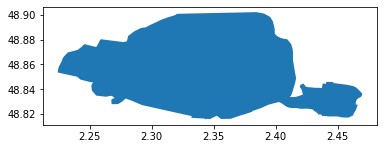

In [257]:
contours.plot()

In [258]:
contours['shape']= contours.geometry.boundary

In [259]:
contours = contours[['code_insee','nom','shape']]

In [260]:
contours=contours.set_geometry('shape')

In [261]:
contours=contours[['code_insee','shape']]

In [262]:
contours=contours[['code_insee','shape']]

In [263]:
contours.to_file("contours_paris2.geojson",driver='GeoJSON')

In [169]:
carte=gpd.read_file(r'C:\Users\morga\Documents\GitHub\MLPython\dataviz\Graphique_bokeh\pop_sansnoms.geojson')

In [170]:
carte=carte[['insee','geometry']]

In [173]:
carte.drop_duplicates(inplace=True)

C:\Users\morga\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


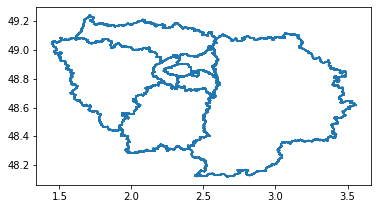

In [188]:
gpd.sjoin(contours, carte, op='intersects',how='left').plot()

In [176]:
gpd.overlay(contours, carte, how='intersection').plot()

TypeError: overlay only takes GeoDataFrames with (multi)polygon  geometries.

In [250]:
carte['bound']=carte.boundary

IllegalArgumentException: Operation not supported by GeometryCollection



ValueError: No Shapely geometry can be created from null value

In [206]:
carte=carte[['insee','bound']]

In [248]:
carte=carte.set_geometry('bound')

In [208]:
contours.geometry.intersects(carte)

0       False
18      False
36      False
54      False
72      False
        ...  
4175    False
4193    False
4211    False
4229    False
4247    False
Length: 238, dtype: bool

In [159]:
gpd.overlay(carte, contours, how='intersection').plot()

AttributeError: 'DataFrame' object has no attribute 'geom_type'

In [166]:
gpd.overlay(carte, contours, how='intersection')

TypeError: overlay only takes GeoDataFrames with (multi)polygon  geometries.

In [210]:
contours['shape']= contours.geometry.boundary

In [211]:
contours = contours[['code_insee','nom','shape']]

In [212]:
contours=contours.set_geometry('shape')

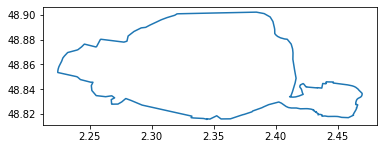

In [213]:
contours.plot()

In [167]:
contour=

,code_insee,nom,shape
75,75,Paris,"LINESTRING (2.35198 48.90149, 2.36561 48.90176..."
77,77,Seine-et-Marne,"LINESTRING (2.86693 48.15627, 2.86641 48.15541..."
78,78,Yvelines,"LINESTRING (1.93408 48.49594, 1.93343 48.49417..."
91,91,Essonne,"LINESTRING (2.39233 48.33593, 2.39382 48.33444..."
92,92,Hauts-de-Seine,"LINESTRING (2.31993 48.77075, 2.31786 48.76867..."
93,93,Seine-Saint-Denis,"LINESTRING (2.41899 48.84939, 2.41636 48.84924..."
94,94,Val-de-Marne,"LINESTRING (2.41450 48.71780, 2.41320 48.71868..."
95,95,Val-d'Oise,"LINESTRING (1.79674 49.07196, 1.79719 49.07144..."


In [96]:
carte=gpd.read_file(r'C:\Users\morga\Documents\GitHub\MLPython\dataviz\Graphique_bokeh\pop_sansnoms.geojson')

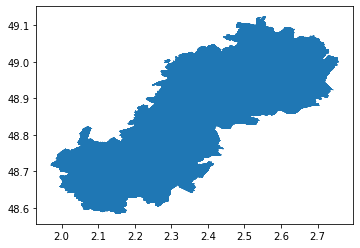

In [98]:
carte.plot()